In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
newsgroups = fetch_20newsgroups(subset='train')

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

print("The shape of X is: ", X.shape)
print("The shape of y is: ", y.shape)

The shape of X is:  (11314, 10000)
The shape of y is:  (11314,)


In [19]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_full, y_train)
y_pred_full = baseline_model.predict(X_test_full)
baseline_accuracy = accuracy_score(y_test, y_pred_full)

print(f"Baseline Accuracy with Full Feature Set: {baseline_accuracy * 100:.2f}%")
print("\nClassification Report (Full Feature Set):\n")
print(classification_report(y_test, y_pred_full))


Baseline Accuracy with Full Feature Set: 88.07%

Classification Report (Full Feature Set):

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        97
           1       0.71      0.86      0.78       104
           2       0.84      0.80      0.82       115
           3       0.73      0.78      0.75       123
           4       0.93      0.79      0.85       126
           5       0.83      0.91      0.87       106
           6       0.75      0.87      0.81       109
           7       0.91      0.92      0.91       139
           8       0.92      0.93      0.93       122
           9       0.92      0.95      0.93       102
          10       0.97      0.94      0.95       108
          11       1.00      0.93      0.96       125
          12       0.83      0.82      0.82       114
          13       0.96      0.92      0.94       119
          14       0.98      0.93      0.95       127
          15       0.85      0.90      0.87

In [22]:
l1_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, C=1.0)
l1_model.fit(X, y)

LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')

In [23]:
coefs = np.abs(l1_model.coef_).sum(axis=0)

top_200_idx = np.argsort(coefs)[-200:][::-1]
feature_names = np.array(vectorizer.get_feature_names_out())[top_200_idx]

print("\nSelected Top 200 Features:")
print(feature_names)

reduced_vectorizer = TfidfVectorizer(vocabulary=feature_names)
X_reduced = reduced_vectorizer.fit_transform(newsgroups.data)




Selected Top 200 Features:
['sale' 'windows' 'dod' 'of' 'clipper' 'hockey' 'athos' 'bike' 'he'
 'tapped' 'israeli' 'israel' 'com' 'nntp' 'orbit' 'clh' 'space' 'the'
 'mac' 'nhl' 'geneva' 'that' 'gun' 'cars' 'god' 'encryption' 'car' 'is'
 'graphics' 'motif' 'guns' 'my' 'armenian' 'baseball' 'in' 'to' 'doctor'
 'bikes' 'crypto' 'anyone' 'playoff' 'turkish' 'for' 'moon' 'automotive'
 'article' 'launch' 'circuit' 'was' 'atheism' 'sandvik' 'x11r5' '3do'
 'and' 'phillies' 'kaldis' 'motorcycle' 'cryptography' 'disease'
 'powerbook' 'apple' 'quadra' 'widget' 'waco' 'iisi' 'government' '3d'
 'mit' 'atf' 'thanks' 'benedikt' 'holocaust' 'server' 'you' 'wiretap' 'it'
 'shipping' 'nsa' 'key' 'cica' 'uk' 'ranch' 'code' 'edu' 'atheists'
 'centris' 'sky' 'diet' 'riding' 'file' 're' 'handgun' 'forsale' 'bmd'
 'duo' 'livesey' 'weapons' 'security' 'drive' 'christian' 'cpr'
 'armenians' 'voltage' 'writes' 'ch981' 'keith' 'biblical' 'window'
 'treatment' 'card' 'sell' 'lcs' 'clinton' 'firearms' 'xterm' 'g

In [24]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

reduced_model = LogisticRegression(max_iter=1000)
reduced_model.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = reduced_model.predict(X_test_reduced)
reduced_accuracy = accuracy_score(y_test_reduced, y_pred_reduced)

print(f"\nAccuracy with Top 200 Features: {reduced_accuracy * 100:.2f}%")
print("\nClassification Report (Reduced Feature Set):\n")
print(classification_report(y_test_reduced, y_pred_reduced))



Accuracy with Top 200 Features: 73.66%

Classification Report (Reduced Feature Set):

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        97
           1       0.64      0.64      0.64       104
           2       0.74      0.67      0.70       115
           3       0.49      0.54      0.51       123
           4       0.80      0.65      0.72       126
           5       0.77      0.81      0.79       106
           6       0.76      0.73      0.75       109
           7       0.76      0.73      0.75       139
           8       0.84      0.83      0.83       122
           9       0.78      0.80      0.79       102
          10       0.88      0.82      0.85       108
          11       0.97      0.89      0.93       125
          12       0.42      0.54      0.48       114
          13       0.57      0.80      0.66       119
          14       0.87      0.76      0.81       127
          15       0.68      0.83      0.75     


Comparison Analysis:
Full Feature Set Accuracy: 88.07%
Reduced Feature Set Accuracy (200 features): 73.66%
Accuracy Difference: 14.41%
Feature Reduction: 9800 features eliminated out of 10000 (98.00%)


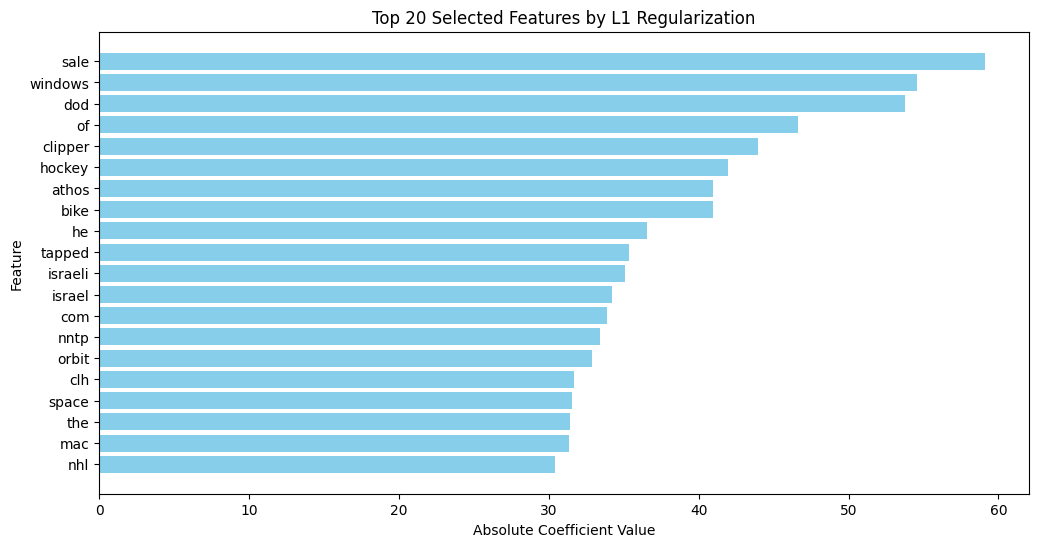

In [25]:
print("\nComparison Analysis:")
print(f"Full Feature Set Accuracy: {baseline_accuracy * 100:.2f}%")
print(f"Reduced Feature Set Accuracy (200 features): {reduced_accuracy * 100:.2f}%")
print(f"Accuracy Difference: {(baseline_accuracy - reduced_accuracy) * 100:.2f}%")
print(f"Feature Reduction: {10000 - 200} features eliminated out of 10000 ({(10000 - 200) / 100:.2f}%)")

top_20_features = feature_names[:20]
top_20_values = coefs[top_200_idx[:20]]

plt.figure(figsize=(12, 6))
plt.barh(top_20_features[::-1], top_20_values[::-1], color='skyblue')
plt.title("Top 20 Selected Features by L1 Regularization")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()
